In [1]:
# Change wd to current dir
import os
# os.chdir('/Projects/Personal/Untitled Folder')
os.getcwd()

'C:\\Projects\\Personal\\university-rankings-analysis'

In [19]:
# Extract data from Babi's image. Not really worth it...
from PIL import Image
import pytesseract
import cv2
# Use config='-psm 6'
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
image = cv2.imread("rankimet.jpg",cv2.IMREAD_COLOR) 
data = pytesseract.image_to_string(Image.open("rankimet.jpg"), lang="eng")#, config='-psm 6')
print(data)

# |Institucioni 2014 2015, 2016) 2017 2018] Progresi 2014-2018
1/Uni. i Prishtinés 4937 4096| 3878) 3938 3133
2|Kolegji AAB - Prishtiné 13949} 21101) 10358| 7308 4603
3|Uni. i Tiranés 6247 6184; 5804) 6260 5440] 4h +807
4|Uni. Epoka - Tirané 5700 5500} 5100) 5759 6217
5|Uni. i Europés Juglindore 7070 7840| 7741| 4618 7751) -681
6|Uni. Shtetroré i Tetovés 11334 8680} 8149) 6762| 11467|\xy e133
7|Uni. Politeknik i Tiranés 8716 7452| 7219] 6291) 11519/y -2803
8)|Kolegji UBT - Prishtiné 11513] 12611] 12838] 15449] 11932/) -419
9|Kol. Universum - Prishtiné 15948; 17801) 17167| 13175] 13047|”h +2901
10/Uni. Bujgésor i Tiranés 5142 5142; 5142) 5444) 13149
11| Uni. i Shkodrés 10132| 12527] 12506] 14864] 13355 “3223
12/Uni. Europian i Tiranés 15145| 15455) 15297] 12514] 13659) +1486
13/Uni.i Prizrenit 21096; 23113} 23856) 14590) 16257
14|Kolegji lliria - Prishtiné 11687) 15365) 15314) 16734) 17729\Ny
15/Uni. i Mitrovcés 16897| 16897) 16897] 14909] 18018) Wy lad

 

 

 

 

 

 

 

 

 

Burim

In [47]:
import pandas as pd

df = pd.read_csv("rankimet_new.csv", index_col="Institucioni", sep=";")
df["ndryshimi"] = df["2019"] - df["2018"]
# df = df.drop(["Progresi 2014-2018"], axis = 1)
display(df)

,2014,2015,2016,2017,2018,2019,ndryshimi
Institucioni,,,,,,,
Uni. i Prishtinës,4937,4096,3878,3938,2429,2668,239
Uni. i Europës Juglindore,7070,7840,7741,4618,4124,4209,85
Uni. i Tiranës,6247,6184,5804,6260,4374,4575,201
Kolegji AAB - Prishtinë,13949,21101,10358,7308,5274,4820,-454
Uni. Bujqësor i Tiranës,5142,5142,5142,5444,5116,5082,-34
Uni. Epoka - Tiranë,5700,5500,5100,5759,4652,5231,579
Uni. Politeknik i Tiranës,8716,7452,7219,6291,5468,5293,-175
Uni. Shtetrorë i Tetovës,11334,8680,8149,6762,5642,5697,55
Uni. i Vlorës,6849,6849,6849,6849,6849,7032,183


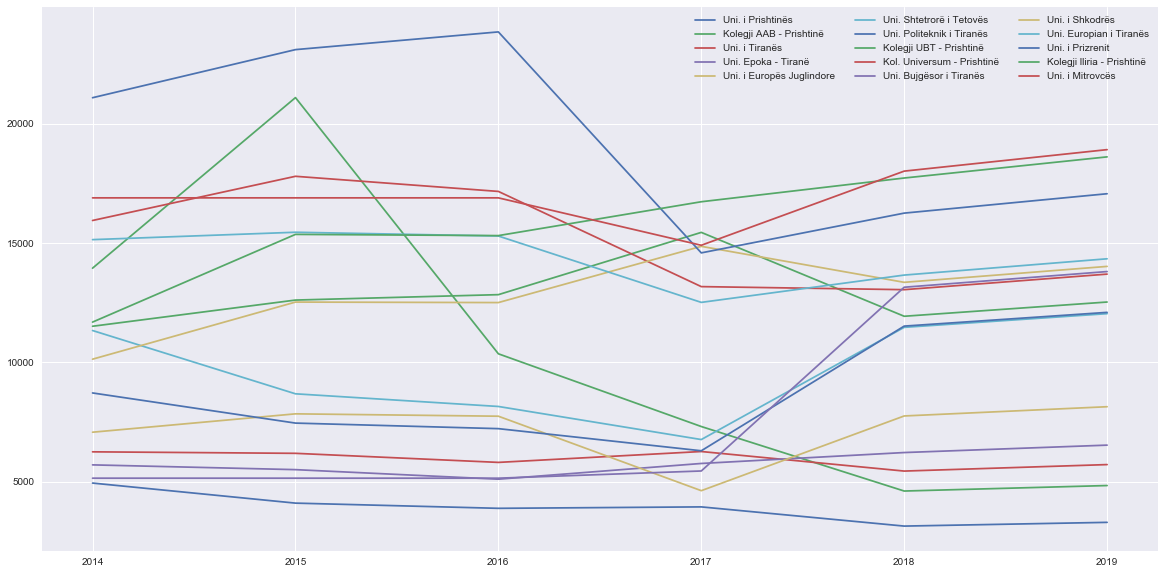

In [57]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(20, 10))

for index, row in df.iterrows():
    plt.plot(row[1:], label=row[0])
plt.legend(loc="upper right", ncol=3)

# Spaghetti chart. Looks like shit.

C:\tools\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['GillSans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


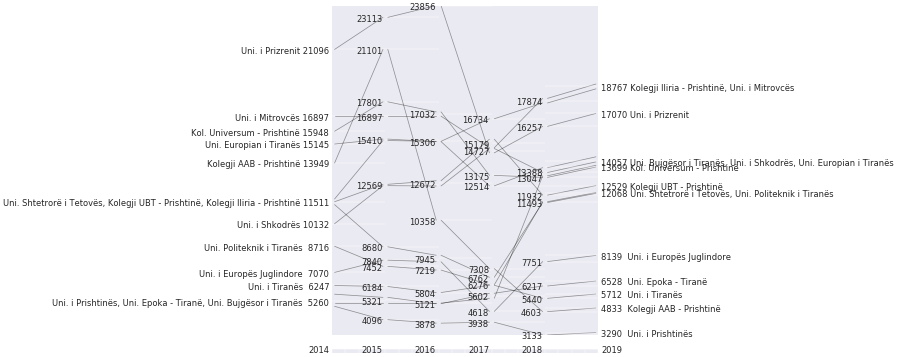

In [69]:
from plotSlope import slope

# Changing font and figure size.
# Notice how some label get lumped together
f = slope(df,width =30,height= 12,kind='interval',font_size=20,marker='%0.f',color=None,savename=None,dpi=200) 

C:\tools\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['GillSans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


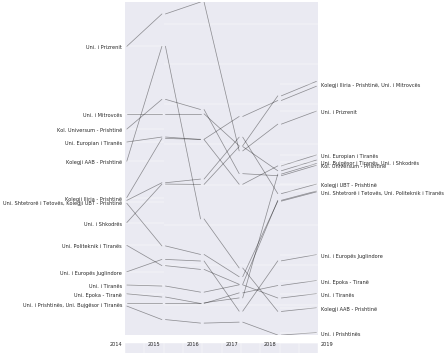

In [71]:
# Without numbers
f = slope(df,width =15,height= 12,kind='interval',marker = None,font_size=12,savename=None,dpi=200) 

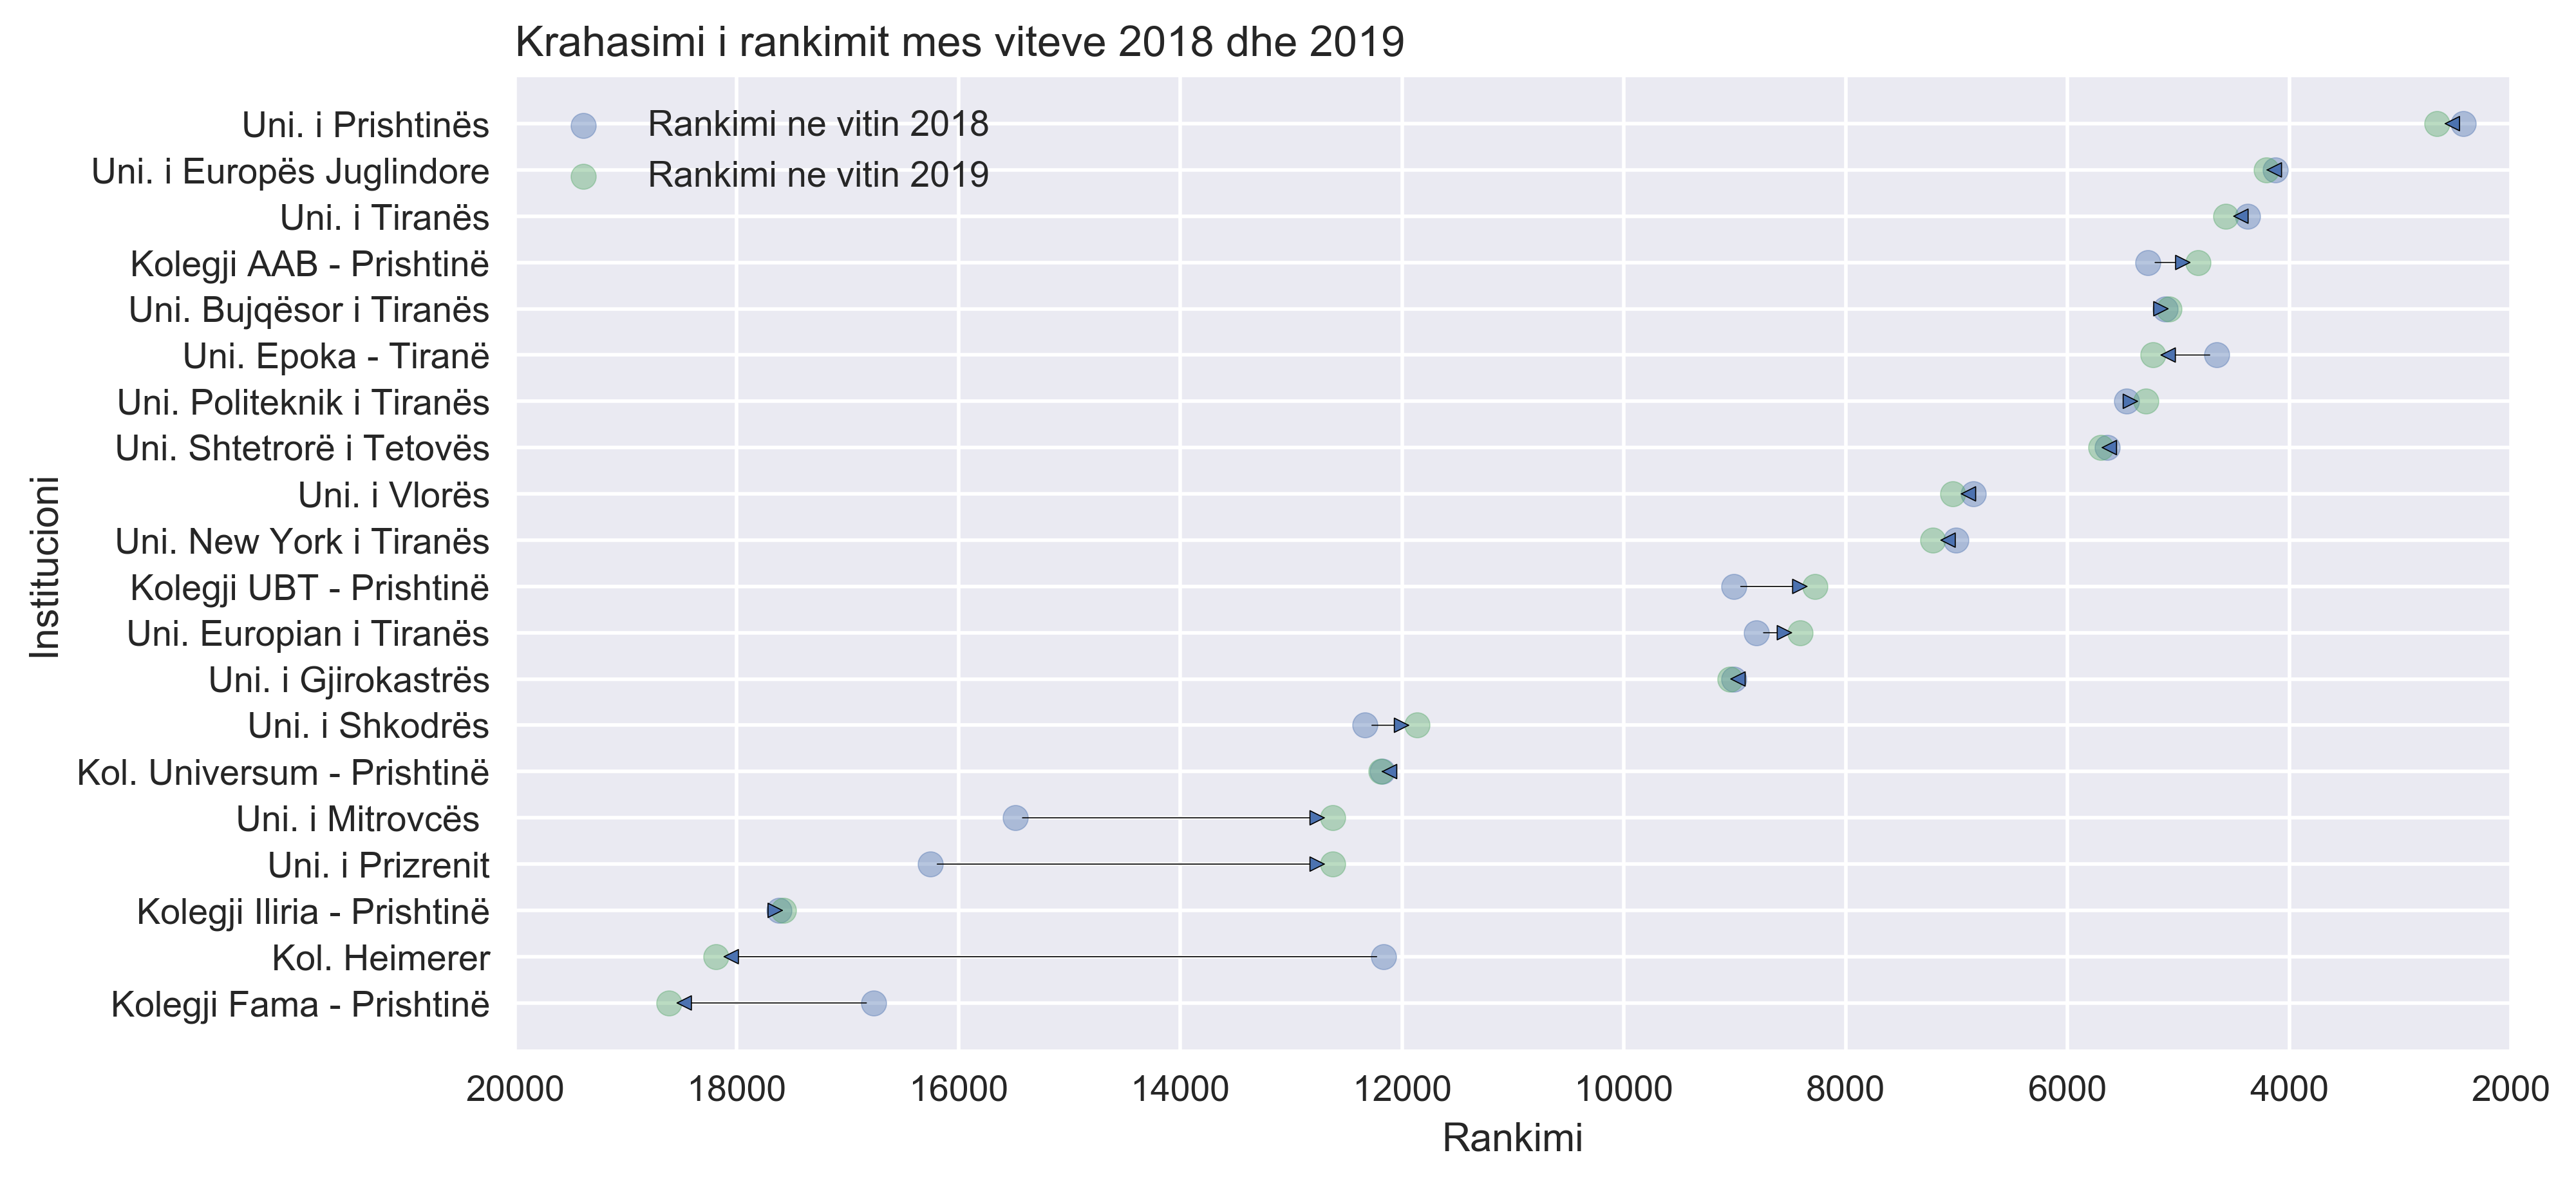

In [74]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
fig, ax = plt.subplots(figsize=(10,5), dpi=400)

# Style
plt.style.use('seaborn')
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='2019', ascending=False)
my_range=range(1,len(df.index)+1)
 
# The vertical plot is made using the hline function
# plt.hlines(y=my_range, xmin=ordered_df['2018'], xmax=ordered_df['2019'], alpha=0.4)
plt.scatter(ordered_df['2018'], my_range, alpha=0.4, label='Rankimi ne vitin 2018')
plt.scatter(ordered_df['2019'], my_range, alpha=0.4 , label='Rankimi ne vitin 2019')
plt.legend()

# Draw arrows
for i in range(0,20):
#     ax.arrow(ordered_df['2018'][i], my_range[i], ordered_df['ndryshimi'][i], 0, width=.05, length_includes_head=True)
    ax.annotate("", xytext=(ordered_df['2018'][i], my_range[i]), 
                 xy=(ordered_df['2019'][i], my_range[i]),arrowprops=dict(arrowstyle="-|>"))

# Reverse x-axis
plt.xlim(20000, 2000)

# Add title and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Krahasimi i rankimit mes viteve 2018 dhe 2019", loc='left')
plt.xlabel('Rankimi')
plt.ylabel('Institucioni')
plt.savefig("krahasimi.png")